In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
train_data=pd.read_excel('C:/Users/Dell/Desktop/flight data.xlsx')

In [4]:
train_data.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


In [5]:
# Deal with missing value

In [6]:
train_data.isna().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              1
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        1
Additional_Info    0
Price              0
dtype: int64

In [7]:
train_data.shape

(10683, 11)

In [8]:
# since the no of NA is very less we may drop the missing value

In [9]:
train_data.dropna(inplace = True)

In [10]:
train_data.isna().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              0
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        0
Additional_Info    0
Price              0
dtype: int64

In [11]:
train_data.dtypes

Airline            object
Date_of_Journey    object
Source             object
Destination        object
Route              object
Dep_Time           object
Arrival_Time       object
Duration           object
Total_Stops        object
Additional_Info    object
Price               int64
dtype: object

In [12]:
# we need to change data type such as dat_of _journey as datetime format

In [13]:
# we define a funtion for such conversion

In [14]:
def change_into_datetime(col):
    train_data[col]=pd.to_datetime(train_data[col])

In [16]:
train_data.columns

Index(['Airline', 'Date_of_Journey', 'Source', 'Destination', 'Route',
       'Dep_Time', 'Arrival_Time', 'Duration', 'Total_Stops',
       'Additional_Info', 'Price'],
      dtype='object')

In [17]:
for i in ['Date_of_Journey','Dep_Time', 'Arrival_Time'] :
    change_into_datetime(i)

In [18]:
train_data.dtypes # succesfully converted to datatime

Airline                    object
Date_of_Journey    datetime64[ns]
Source                     object
Destination                object
Route                      object
Dep_Time           datetime64[ns]
Arrival_Time       datetime64[ns]
Duration                   object
Total_Stops                object
Additional_Info            object
Price                       int64
dtype: object

In [19]:
# create new colum for journey month and day

In [20]:
train_data['Journey_day']=train_data['Date_of_Journey'].dt.day

In [21]:
train_data['Journey_Month']=train_data['Date_of_Journey'].dt.month

In [22]:
train_data.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Journey_day,Journey_Month
0,IndiGo,2019-03-24,Banglore,New Delhi,BLR → DEL,2022-04-02 22:20:00,2022-03-22 01:10:00,2h 50m,non-stop,No info,3897,24,3
1,Air India,2019-01-05,Kolkata,Banglore,CCU → IXR → BBI → BLR,2022-04-02 05:50:00,2022-04-02 13:15:00,7h 25m,2 stops,No info,7662,5,1
2,Jet Airways,2019-09-06,Delhi,Cochin,DEL → LKO → BOM → COK,2022-04-02 09:25:00,2022-06-10 04:25:00,19h,2 stops,No info,13882,6,9
3,IndiGo,2019-12-05,Kolkata,Banglore,CCU → NAG → BLR,2022-04-02 18:05:00,2022-04-02 23:30:00,5h 25m,1 stop,No info,6218,5,12
4,IndiGo,2019-01-03,Banglore,New Delhi,BLR → NAG → DEL,2022-04-02 16:50:00,2022-04-02 21:35:00,4h 45m,1 stop,No info,13302,3,1


In [23]:
## Since we have converted Date_of_Journey column into integers, Now we can drop as it is of no use.

In [24]:
train_data.drop('Date_of_Journey', axis=1, inplace=True)

In [25]:
train_data.head()

,Airline,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Journey_day,Journey_Month
0,IndiGo,Banglore,New Delhi,BLR → DEL,2022-04-02 22:20:00,2022-03-22 01:10:00,2h 50m,non-stop,No info,3897,24,3
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,2022-04-02 05:50:00,2022-04-02 13:15:00,7h 25m,2 stops,No info,7662,5,1
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,2022-04-02 09:25:00,2022-06-10 04:25:00,19h,2 stops,No info,13882,6,9
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,2022-04-02 18:05:00,2022-04-02 23:30:00,5h 25m,1 stop,No info,6218,5,12
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,2022-04-02 16:50:00,2022-04-02 21:35:00,4h 45m,1 stop,No info,13302,3,1


In [26]:
# Define new function to extract hour and minutes as well drop columns

In [27]:
def extract_hour(df,col):
    df[col+"_hour"]=df[col].dt.hour

In [28]:
def extract_min(df,col):
    df[col+"_minute"]=df[col].dt.minute

In [29]:
def drop_column(df,col):
    df.drop(col,axis=1,inplace=True)

In [30]:
extract_hour(train_data,'Dep_Time')
extract_min(train_data,'Dep_Time')

In [31]:
drop_column(train_data,'Dep_Time')

In [30]:
train_data.head()

,Airline,Source,Destination,Route,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Journey_day,Journey_Month,Dep_Time_hour,Dep_Time_minute
0,IndiGo,Banglore,New Delhi,BLR → DEL,2022-03-22 01:10:00,2h 50m,non-stop,No info,3897,24,3,22,20
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,2022-04-01 13:15:00,7h 25m,2 stops,No info,7662,5,1,5,50
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,2022-06-10 04:25:00,19h,2 stops,No info,13882,6,9,9,25
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,2022-04-01 23:30:00,5h 25m,1 stop,No info,6218,5,12,18,5
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,2022-04-01 21:35:00,4h 45m,1 stop,No info,13302,3,1,16,50


In [31]:
# Repeat the Same process for arrival

In [32]:
extract_hour(train_data,'Arrival_Time')
extract_min(train_data,'Arrival_Time')

In [33]:
# Now we can drop Arrival_Time as it is of no use
drop_column(train_data,'Arrival_Time')

In [34]:
train_data.head()

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Journey_day,Journey_Month,Dep_Time_hour,Dep_Time_minute,Arrival_Time_hour,Arrival_Time_minute
0,IndiGo,Banglore,New Delhi,BLR → DEL,2h 50m,non-stop,No info,3897,24,3,22,20,1,10
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,7h 25m,2 stops,No info,7662,5,1,5,50,13,15
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,19h,2 stops,No info,13882,6,9,9,25,4,25
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,5h 25m,1 stop,No info,6218,5,12,18,5,23,30
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,4h 45m,1 stop,No info,13302,3,1,16,50,21,35


In [36]:
#Separate Duration hours and minute from duration

In [37]:
duration=list(train_data['Duration'])

for i in range(len(duration)):
    if len(duration[i].split(' '))==2:
        pass
    else:
        if 'h' in duration[i]:                   # Check if duration contains only hour
            duration[i]=duration[i] + ' 0m'      # Adds 0 minute
        else:
            duration[i]='0h '+ duration[i]       # if duration contains only second, Adds 0 hour

In [38]:
train_data['Duration']=duration

In [39]:
train_data.head()

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Journey_day,Journey_Month,Dep_Time_hour,Dep_Time_minute,Arrival_Time_hour,Arrival_Time_minute
0,IndiGo,Banglore,New Delhi,BLR → DEL,2h 50m,non-stop,No info,3897,24,3,22,20,1,10
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,7h 25m,2 stops,No info,7662,5,1,5,50,13,15
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,19h 0m,2 stops,No info,13882,6,9,9,25,4,25
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,5h 25m,1 stop,No info,6218,5,12,18,5,23,30
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,4h 45m,1 stop,No info,13302,3,1,16,50,21,35


In [40]:
def hour(x):
    return x.split(' ')[0][0:-1]

In [41]:
def min(x):
    return x.split(' ')[1][0:-1]

In [42]:
train_data['Duration_hours']=train_data['Duration'].apply(hour)
train_data['Duration_mins']=train_data['Duration'].apply(min)

In [43]:
train_data.head()

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Journey_day,Journey_Month,Dep_Time_hour,Dep_Time_minute,Arrival_Time_hour,Arrival_Time_minute,Duration_hours,Duration_mins
0,IndiGo,Banglore,New Delhi,BLR → DEL,2h 50m,non-stop,No info,3897,24,3,22,20,1,10,2,50
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,7h 25m,2 stops,No info,7662,5,1,5,50,13,15,7,25
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,19h 0m,2 stops,No info,13882,6,9,9,25,4,25,19,0
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,5h 25m,1 stop,No info,6218,5,12,18,5,23,30,5,25
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,4h 45m,1 stop,No info,13302,3,1,16,50,21,35,4,45


In [44]:
train_data.drop('Duration',axis=1,inplace=True)

In [45]:
train_data.head()

,Airline,Source,Destination,Route,Total_Stops,Additional_Info,Price,Journey_day,Journey_Month,Dep_Time_hour,Dep_Time_minute,Arrival_Time_hour,Arrival_Time_minute,Duration_hours,Duration_mins
0,IndiGo,Banglore,New Delhi,BLR → DEL,non-stop,No info,3897,24,3,22,20,1,10,2,50
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,2 stops,No info,7662,5,1,5,50,13,15,7,25
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,2 stops,No info,13882,6,9,9,25,4,25,19,0
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,1 stop,No info,6218,5,12,18,5,23,30,5,25
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,1 stop,No info,13302,3,1,16,50,21,35,4,45


In [46]:
train_data.dtypes

Airline                object
Source                 object
Destination            object
Route                  object
Total_Stops            object
Additional_Info        object
Price                   int64
Journey_day             int64
Journey_Month           int64
Dep_Time_hour           int64
Dep_Time_minute         int64
Arrival_Time_hour       int64
Arrival_Time_minute     int64
Duration_hours         object
Duration_mins          object
dtype: object

In [47]:
train_data['Duration_hours']=train_data['Duration_hours'].astype(int)
train_data['Duration_mins']=train_data['Duration_mins'].astype(int)

In [48]:
train_data.dtypes

Airline                object
Source                 object
Destination            object
Route                  object
Total_Stops            object
Additional_Info        object
Price                   int64
Journey_day             int64
Journey_Month           int64
Dep_Time_hour           int64
Dep_Time_minute         int64
Arrival_Time_hour       int64
Arrival_Time_minute     int64
Duration_hours          int32
Duration_mins           int32
dtype: object

In [49]:
# IN ORDER TO DISTINGUISH BETWEEN NOMINAL AND CATEGORICAL DATA, ABOVE DETAILL MATTERS

In [50]:
# Pass a funtion to identify categorical and numerical data( continous feature) and create  as list

In [51]:
cat_col=[col for col in train_data.columns if train_data[col].dtype=='O']
cat_col

['Airline', 'Source', 'Destination', 'Route', 'Total_Stops', 'Additional_Info']

In [52]:
cont_col=[col for col in train_data.columns if train_data[col].dtype!='O']
cont_col

['Price',
 'Journey_day',
 'Journey_Month',
 'Dep_Time_hour',
 'Dep_Time_minute',
 'Arrival_Time_hour',
 'Arrival_Time_minute',
 'Duration_hours',
 'Duration_mins']

# How to handle categorical data


In [53]:
#We are using 2 main Encoding Techniques to convert Categorical data into some numerical format
#There two types of categorical Data.
#Nominal data --> data are not in any order such as name of country
#Ordinal data --> data are in order or you may say there some kind of heirachy(relation/conncetion)  such good, bad , excellent  

In [54]:
# In case of Nominal data--> OneHotEncoder is used in this case
# In case of Ordinal data--> LabelEncoder is used in this case

In [55]:
categorical= train_data[cat_col]

In [56]:
categorical.head()

,Airline,Source,Destination,Route,Total_Stops,Additional_Info
0,IndiGo,Banglore,New Delhi,BLR → DEL,non-stop,No info
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,2 stops,No info
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,2 stops,No info
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,1 stop,No info
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,1 stop,No info


In [57]:
categorical['Airline'].value_counts()

Jet Airways                          3849
IndiGo                               2053
Air India                            1751
Multiple carriers                    1196
SpiceJet                              818
Vistara                               479
Air Asia                              319
GoAir                                 194
Multiple carriers Premium economy      13
Jet Airways Business                    6
Vistara Premium economy                 3
Trujet                                  1
Name: Airline, dtype: int64

In [58]:
#Airline vs Price Analysis

<AxesSubplot:xlabel='Airline', ylabel='Price'>

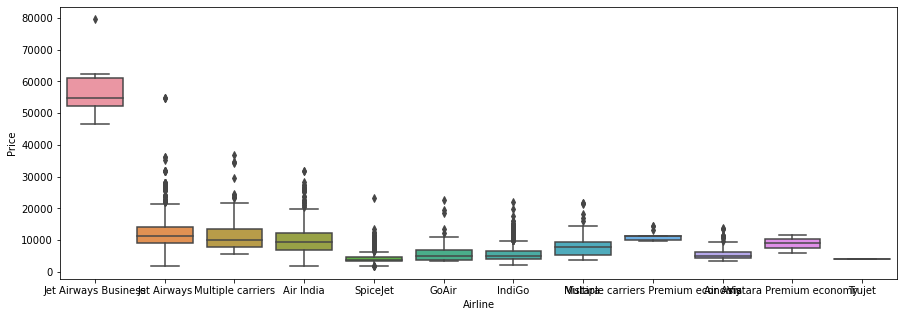

In [59]:
plt.figure(figsize=(15,5))
sns.boxplot(y='Price',x='Airline',data=train_data.sort_values('Price',ascending=False))

In [60]:
#Stop vs Price Analysis

<AxesSubplot:xlabel='Total_Stops', ylabel='Price'>

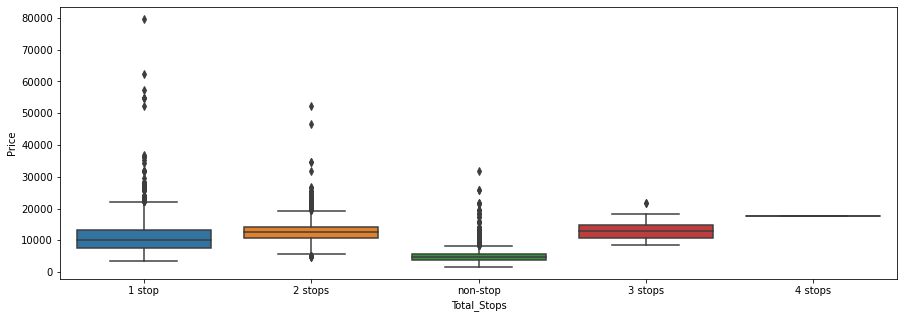

In [61]:
plt.figure(figsize=(15,5))
sns.boxplot(y='Price',x='Total_Stops',data=train_data.sort_values('Price',ascending=False))

# As  machine learning doesnt recognises airline names we  will asign  them to integer Using one hot encoding data

#one hot Encoding ( get dummies)

In [62]:
Airline=pd.get_dummies(categorical['Airline'],drop_first=True)

In [63]:
Airline.head()

,Air India,GoAir,IndiGo,Jet Airways,Jet Airways Business,Multiple carriers,Multiple carriers Premium economy,SpiceJet,Trujet,Vistara,Vistara Premium economy
0,0,0,1,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,0
2,0,0,0,1,0,0,0,0,0,0,0
3,0,0,1,0,0,0,0,0,0,0,0
4,0,0,1,0,0,0,0,0,0,0,0


In [64]:
categorical['Source'].value_counts()

Delhi       4536
Kolkata     2871
Banglore    2197
Mumbai       697
Chennai      381
Name: Source, dtype: int64

In [78]:
# Source vs Price

<AxesSubplot:xlabel='Source', ylabel='Price'>

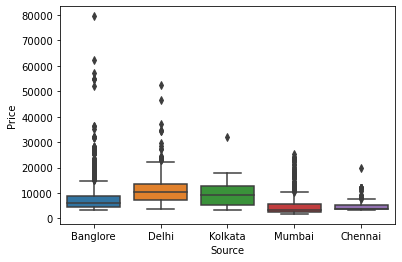

In [65]:
sns.boxplot(y='Price',x='Source',data=train_data.sort_values('Price',ascending=False))

In [66]:
# As Source is Nominal Categorical data we will perform OneHotEncoding
Source=pd.get_dummies(categorical['Source'],drop_first=True)
Source.head()

,Chennai,Delhi,Kolkata,Mumbai
0,0,0,0,0
1,0,0,1,0
2,0,1,0,0
3,0,0,1,0
4,0,0,0,0


In [67]:
categorical['Destination'].value_counts()

Cochin       4536
Banglore     2871
Delhi        1265
New Delhi     932
Hyderabad     697
Kolkata       381
Name: Destination, dtype: int64

<AxesSubplot:xlabel='Destination', ylabel='Price'>

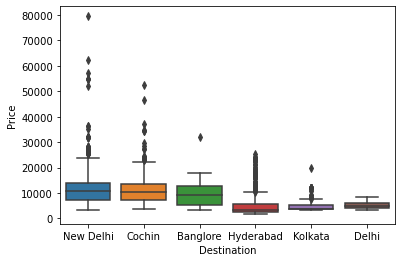

In [68]:
sns.boxplot(y='Price',x='Destination',data=train_data.sort_values('Price',ascending=False))

In [69]:
# As Destination is Nominal Categorical data we will perform OneHotEncoding
Source=pd.get_dummies(categorical['Destination'],drop_first=True)
Source.head()

,Cochin,Delhi,Hyderabad,Kolkata,New Delhi
0,0,0,0,0,1
1,0,0,0,0,0
2,1,0,0,0,0
3,0,0,0,0,0
4,0,0,0,0,1


In [70]:
train_data.head()

,Airline,Source,Destination,Route,Total_Stops,Additional_Info,Price,Journey_day,Journey_Month,Dep_Time_hour,Dep_Time_minute,Arrival_Time_hour,Arrival_Time_minute,Duration_hours,Duration_mins
0,IndiGo,Banglore,New Delhi,BLR → DEL,non-stop,No info,3897,24,3,22,20,1,10,2,50
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,2 stops,No info,7662,5,1,5,50,13,15,7,25
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,2 stops,No info,13882,6,9,9,25,4,25,19,0
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,1 stop,No info,6218,5,12,18,5,23,30,5,25
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,1 stop,No info,13302,3,1,16,50,21,35,4,45


# label encoding as route is ordinal data with some kind of herichy

In [72]:
categorical['Route']

0                    BLR → DEL
1        CCU → IXR → BBI → BLR
2        DEL → LKO → BOM → COK
3              CCU → NAG → BLR
4              BLR → NAG → DEL
                 ...          
10678                CCU → BLR
10679                CCU → BLR
10680                BLR → DEL
10681                BLR → DEL
10682    DEL → GOI → BOM → COK
Name: Route, Length: 10682, dtype: object

In [73]:
# we have to split route 

In [74]:
categorical['Route_1']=categorical['Route'].str.split('→').str[0]
categorical['Route_2']=categorical['Route'].str.split('→').str[1]
categorical['Route_3']=categorical['Route'].str.split('→').str[2]
categorical['Route_4']=categorical['Route'].str.split('→').str[3]
categorical['Route_5']=categorical['Route'].str.split('→').str[4]

C:\Users\Dell\AppData\Local\Temp/ipykernel_11368/1757746633.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  categorical['Route_1']=categorical['Route'].str.split('→').str[0]
C:\Users\Dell\AppData\Local\Temp/ipykernel_11368/1757746633.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  categorical['Route_2']=categorical['Route'].str.split('→').str[1]
C:\Users\Dell\AppData\Local\Temp/ipykernel_11368/1757746633.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

In [75]:
categorical.head()

,Airline,Source,Destination,Route,Total_Stops,Additional_Info,Route_1,Route_2,Route_3,Route_4,Route_5
0,IndiGo,Banglore,New Delhi,BLR → DEL,non-stop,No info,BLR,DEL,NaN,NaN,NaN
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,2 stops,No info,CCU,IXR,BBI,BLR,NaN
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,2 stops,No info,DEL,LKO,BOM,COK,NaN
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,1 stop,No info,CCU,NAG,BLR,NaN,NaN
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,1 stop,No info,BLR,NAG,DEL,NaN,NaN


In [98]:
categorical.isna().sum()

Airline        0
Source         0
Destination    0
Total_Stops    0
Route_1        0
Route_2        0
Route_3        0
Route_4        0
Route_5        0
dtype: int64

In [82]:
#Drop unncessary columns

In [83]:
drop_column(categorical,'Route')
drop_column(categorical,'Additional_Info')

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [84]:
categorical.head()

,Airline,Source,Destination,Total_Stops,Route_1,Route_2,Route_3,Route_4,Route_5
0,IndiGo,Banglore,New Delhi,non-stop,BLR,DEL,NaN,NaN,NaN
1,Air India,Kolkata,Banglore,2 stops,CCU,IXR,BBI,BLR,NaN
2,Jet Airways,Delhi,Cochin,2 stops,DEL,LKO,BOM,COK,NaN
3,IndiGo,Kolkata,Banglore,1 stop,CCU,NAG,BLR,NaN,NaN
4,IndiGo,Banglore,New Delhi,1 stop,BLR,NAG,DEL,NaN,NaN


In [85]:
# Replace Null/NA values

In [86]:
categorical['Route_1'].fillna('None',inplace=True)
categorical['Route_2'].fillna('None',inplace=True)
categorical['Route_3'].fillna('None',inplace=True)
categorical['Route_4'].fillna('None',inplace=True)
categorical['Route_5'].fillna('None',inplace=True)

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\generic.py:6392: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return self._update_inplace(result)


In [87]:
categorical.isna().sum()

Airline        0
Source         0
Destination    0
Total_Stops    0
Route_1        0
Route_2        0
Route_3        0
Route_4        0
Route_5        0
dtype: int64

In [89]:
# you can also pass a funtion 
#for i=['Route3','Route4','Route5']:
#categorical[i].fillna('None',inplace=True)

In [90]:
#Now extract how many categories in each cat_feature
for feature in categorical.columns:
    print('{} has total {} categories \n'.format(feature,len(categorical[feature].value_counts())))

Airline has total 12 categories 

Source has total 5 categories 

Destination has total 6 categories 

Total_Stops has total 5 categories 

Route_1 has total 5 categories 

Route_2 has total 45 categories 

Route_3 has total 30 categories 

Route_4 has total 14 categories 

Route_5 has total 6 categories 



In [91]:
### as we will see we have lots of features in Route , one hot encoding will not be a better option lets appply Label Encoding

In [92]:
import sklearn

In [93]:
from sklearn.preprocessing import LabelEncoder

In [94]:
encoder=LabelEncoder()

In [95]:
categorical.columns

Index(['Airline', 'Source', 'Destination', 'Total_Stops', 'Route_1', 'Route_2',
       'Route_3', 'Route_4', 'Route_5'],
      dtype='object')

In [96]:
for i in ['Route_1', 'Route_2', 'Route_3', 'Route_4','Route_5']:
    categorical[i]=encoder.fit_transform(categorical[i])

C:\Users\Dell\AppData\Local\Temp/ipykernel_11368/3439311890.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  categorical[i]=encoder.fit_transform(categorical[i])


In [97]:
categorical.head()

,Airline,Source,Destination,Total_Stops,Route_1,Route_2,Route_3,Route_4,Route_5
0,IndiGo,Banglore,New Delhi,non-stop,0,13,29,13,5
1,Air India,Kolkata,Banglore,2 stops,2,25,1,3,5
2,Jet Airways,Delhi,Cochin,2 stops,3,32,4,5,5
3,IndiGo,Kolkata,Banglore,1 stop,2,34,3,13,5
4,IndiGo,Banglore,New Delhi,1 stop,0,34,8,13,5


In [99]:
categorical['Total_Stops'].value_counts()

1 stop      5625
non-stop    3491
2 stops     1520
3 stops       45
4 stops        1
Name: Total_Stops, dtype: int64

In [100]:
categorical['Total_Stops'].unique()

array(['non-stop', '2 stops', '1 stop', '3 stops', '4 stops'],
      dtype=object)

In [101]:
# for label encoding we use dictionary function and Map it list

In [102]:
dict={'non-stop':0, '2 stops':2, '1 stop':1, '3 stops':3, '4 stops':4}

In [103]:
categorical['Total_Stops']=categorical['Total_Stops'].map(dict)

C:\Users\Dell\AppData\Local\Temp/ipykernel_11368/130354464.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  categorical['Total_Stops']=categorical['Total_Stops'].map(dict)


In [104]:
categorical.head()

,Airline,Source,Destination,Total_Stops,Route_1,Route_2,Route_3,Route_4,Route_5
0,IndiGo,Banglore,New Delhi,0,0,13,29,13,5
1,Air India,Kolkata,Banglore,2,2,25,1,3,5
2,Jet Airways,Delhi,Cochin,2,3,32,4,5,5
3,IndiGo,Kolkata,Banglore,1,2,34,3,13,5
4,IndiGo,Banglore,New Delhi,1,0,34,8,13,5


In [106]:
train_data[cont_col] 

,Price,Journey_day,Journey_Month,Dep_Time_hour,Dep_Time_minute,Arrival_Time_hour,Arrival_Time_minute,Duration_hours,Duration_mins
0,3897,24,3,22,20,1,10,2,50
1,7662,5,1,5,50,13,15,7,25
2,13882,6,9,9,25,4,25,19,0
3,6218,5,12,18,5,23,30,5,25
4,13302,3,1,16,50,21,35,4,45
...,...,...,...,...,...,...,...,...,...
10678,4107,4,9,19,55,22,25,2,30
10679,4145,27,4,20,45,23,20,2,35
10680,7229,27,4,8,20,11,20,3,0
10681,12648,3,1,11,30,14,10,2,40


In [107]:
train_data.head()

,Airline,Source,Destination,Route,Total_Stops,Additional_Info,Price,Journey_day,Journey_Month,Dep_Time_hour,Dep_Time_minute,Arrival_Time_hour,Arrival_Time_minute,Duration_hours,Duration_mins
0,IndiGo,Banglore,New Delhi,BLR → DEL,non-stop,No info,3897,24,3,22,20,1,10,2,50
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,2 stops,No info,7662,5,1,5,50,13,15,7,25
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,2 stops,No info,13882,6,9,9,25,4,25,19,0
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,1 stop,No info,6218,5,12,18,5,23,30,5,25
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,1 stop,No info,13302,3,1,16,50,21,35,4,45


In [108]:
# Concatenate dataframe --> categorical + Airline + Source + Destination

data_train=pd.concat([categorical,Airline,Source,train_data[cont_col]],axis=1)
data_train.head()

,Airline,Source,Destination,Total_Stops,Route_1,Route_2,Route_3,Route_4,Route_5,Air India,...,New Delhi,Price,Journey_day,Journey_Month,Dep_Time_hour,Dep_Time_minute,Arrival_Time_hour,Arrival_Time_minute,Duration_hours,Duration_mins
0,IndiGo,Banglore,New Delhi,0,0,13,29,13,5,0,...,1,3897,24,3,22,20,1,10,2,50
1,Air India,Kolkata,Banglore,2,2,25,1,3,5,1,...,0,7662,5,1,5,50,13,15,7,25
2,Jet Airways,Delhi,Cochin,2,3,32,4,5,5,0,...,0,13882,6,9,9,25,4,25,19,0
3,IndiGo,Kolkata,Banglore,1,2,34,3,13,5,0,...,0,6218,5,12,18,5,23,30,5,25
4,IndiGo,Banglore,New Delhi,1,0,34,8,13,5,0,...,1,13302,3,1,16,50,21,35,4,45


In [109]:
drop_column(data_train,'Airline')
drop_column(data_train,'Source')
drop_column(data_train,'Destination')

In [110]:
# you can also set number of row/column youu wish  to see by set function

In [111]:
pd.set_option('display.max_columns',35)

In [112]:
data_train.head()

,Total_Stops,Route_1,Route_2,Route_3,Route_4,Route_5,Air India,GoAir,IndiGo,Jet Airways,Jet Airways Business,Multiple carriers,Multiple carriers Premium economy,SpiceJet,Trujet,Vistara,Vistara Premium economy,Cochin,Delhi,Hyderabad,Kolkata,New Delhi,Price,Journey_day,Journey_Month,Dep_Time_hour,Dep_Time_minute,Arrival_Time_hour,Arrival_Time_minute,Duration_hours,Duration_mins
0,0,0,13,29,13,5,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,3897,24,3,22,20,1,10,2,50
1,2,2,25,1,3,5,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,7662,5,1,5,50,13,15,7,25
2,2,3,32,4,5,5,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,13882,6,9,9,25,4,25,19,0
3,1,2,34,3,13,5,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,6218,5,12,18,5,23,30,5,25
4,1,0,34,8,13,5,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,13302,3,1,16,50,21,35,4,45


In [114]:
data_train.columns

Index(['Total_Stops', 'Route_1', 'Route_2', 'Route_3', 'Route_4', 'Route_5',
       'Air India', 'GoAir', 'IndiGo', 'Jet Airways', 'Jet Airways Business',
       'Multiple carriers', 'Multiple carriers Premium economy', 'SpiceJet',
       'Trujet', 'Vistara', 'Vistara Premium economy', 'Cochin', 'Delhi',
       'Hyderabad', 'Kolkata', 'New Delhi', 'Price', 'Journey_day',
       'Journey_Month', 'Dep_Time_hour', 'Dep_Time_minute',
       'Arrival_Time_hour', 'Arrival_Time_minute', 'Duration_hours',
       'Duration_mins'],
      dtype='object')

In [117]:
# Outlier detection 

In [115]:
def plot(df,col):
    fig,(ax1,ax2)=plt.subplots(2,1)
    sns.distplot(df[col],ax=ax1)
    sns.boxplot(df[col],ax=ax2)

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<Figure size 2160x1440 with 0 Axes>

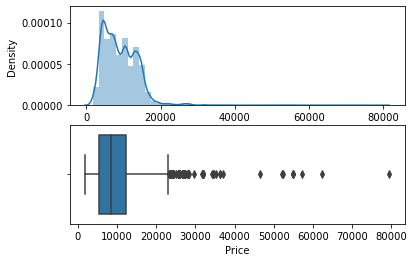

In [116]:
plt.figure(figsize=(30,20))
plot(data_train,'Price')

In [ ]:
# How to deal with outlier.

# method-1 delete the row but should be avoided
# method-2 replace with median.
# we shall go for method 2.


In [118]:
# replacing outlier with median
data_train['Price']=np.where(data_train['Price']>=40000,data_train['Price'].median(),data_train['Price'])

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<Figure size 2160x1440 with 0 Axes>

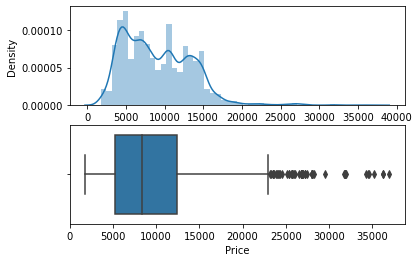

In [119]:
plt.figure(figsize=(30,20))
plot(data_train,'Price')

In [120]:
### separate your independent & dependent data as we dont need price variable.

In [121]:
X=data_train.drop('Price',axis=1)
X.head()

,Total_Stops,Route_1,Route_2,Route_3,Route_4,Route_5,Air India,GoAir,IndiGo,Jet Airways,Jet Airways Business,Multiple carriers,Multiple carriers Premium economy,SpiceJet,Trujet,Vistara,Vistara Premium economy,Cochin,Delhi,Hyderabad,Kolkata,New Delhi,Journey_day,Journey_Month,Dep_Time_hour,Dep_Time_minute,Arrival_Time_hour,Arrival_Time_minute,Duration_hours,Duration_mins
0,0,0,13,29,13,5,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,24,3,22,20,1,10,2,50
1,2,2,25,1,3,5,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,5,1,5,50,13,15,7,25
2,2,3,32,4,5,5,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,6,9,9,25,4,25,19,0
3,1,2,34,3,13,5,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,5,12,18,5,23,30,5,25
4,1,0,34,8,13,5,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,3,1,16,50,21,35,4,45


In [122]:
data_train.shape

(10682, 31)

In [124]:
X.shape

(10682, 30)

In [125]:
y=data_train['Price']

In [126]:
y

0         3897.0
1         7662.0
2        13882.0
3         6218.0
4        13302.0
          ...   
10678     4107.0
10679     4145.0
10680     7229.0
10681    12648.0
10682    11753.0
Name: Price, Length: 10682, dtype: float64

### Feature Selection is used Finding out the best feature which will contribute and have good relation with target variable. and to get rid of duplicate features
    

In [129]:
#Feature Selection using Information Gain

In [130]:
from sklearn.feature_selection import mutual_info_classif

In [131]:
X.dtypes

Total_Stops                          int64
Route_1                              int32
Route_2                              int32
Route_3                              int32
Route_4                              int32
Route_5                              int32
Air India                            uint8
GoAir                                uint8
IndiGo                               uint8
Jet Airways                          uint8
Jet Airways Business                 uint8
Multiple carriers                    uint8
Multiple carriers Premium economy    uint8
SpiceJet                             uint8
Trujet                               uint8
Vistara                              uint8
Vistara Premium economy              uint8
Cochin                               uint8
Delhi                                uint8
Hyderabad                            uint8
Kolkata                              uint8
New Delhi                            uint8
Journey_day                          int64
Journey_Mon

In [132]:
y.dtypes

dtype('float64')

In [133]:
mutual_info_classif(X,y)

array([2.14717919, 2.0570502 , 2.80343324, 2.29703965, 1.47026472,
       0.74258903, 0.7559066 , 0.09799769, 0.67165895, 0.91788644,
       0.01603217, 0.55881312, 0.00469931, 0.32205724, 0.        ,
       0.21745607, 0.        , 1.52067099, 0.41660201, 0.29289464,
       0.16195639, 0.37291888, 1.07511595, 0.91339089, 1.45198192,
       1.22052821, 1.83223911, 1.51313993, 1.76075848, 1.07221312])

In [134]:
imp=pd.DataFrame(mutual_info_classif(X,y),index=X.columns)
imp

,0
Total_Stops,2.134837
Route_1,2.051404
Route_2,2.767669
Route_3,2.303237
Route_4,1.507156
Route_5,0.723679
Air India,0.769308
GoAir,0.095523
IndiGo,0.663985
Jet Airways,0.927454


In [135]:
imp.columns=['importance']
imp.sort_values(by='importance',ascending=False)

,importance
Route_2,2.767669
Route_3,2.303237
Total_Stops,2.134837
Route_1,2.051404
Arrival_Time_hour,1.855776
Duration_hours,1.781760
Arrival_Time_minute,1.536084
Cochin,1.522170
Route_4,1.507156
Dep_Time_hour,1.418563


# first step of prediction is to split dataset into train & test

In [136]:
from sklearn.model_selection import train_test_split

In [137]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2)

In [143]:
from sklearn import metrics
##dump your model using pickle so that we will re-use
import pickle
def predict(ml_model,dump):
    model=ml_model.fit(X_train,y_train)
    print('Training score : {}'.format(model.score(X_train,y_train)))
    y_prediction=model.predict(X_test)
    print('predictions are: \n {}'.format(y_prediction))
    print('\n')
    r2_score=metrics.r2_score(y_test,y_prediction)
    print('r2 score: {}'.format(r2_score))
    print('MAE:',metrics.mean_absolute_error(y_test,y_prediction))
    print('MSE:',metrics.mean_squared_error(y_test,y_prediction))
    print('RMSE:',np.sqrt(metrics.mean_squared_error(y_test,y_prediction)))
    sns.distplot(y_test-y_prediction)
    
    if dump==1:
        ##dump your model using pickle so that we will re-use
        file=open('C:/Users/Dell/Desktop/model.pkl','wb')
        pickle.dump(model,file)

In [144]:
#import randomforest class

In [145]:
from sklearn.ensemble import RandomForestRegressor

Training score : 0.9532191365550899
predictions are: 
 [ 6967.09   4343.18  12666.933 ...  8249.316  5377.9   20087.305]


r2 score: 0.8251178251903487
MAE: 1161.5466048352025
MSE: 3626982.69932577
RMSE: 1904.4638876402382


C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


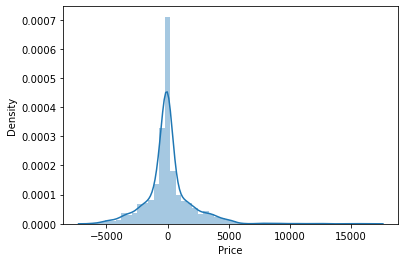

In [146]:
predict(RandomForestRegressor(),1)

In [147]:
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor

Training score : 0.6178382796478658
predictions are: 
 [ 9215.44679859  7463.24413752 11594.29236025 ...  8847.5990028
  5286.05206137 14515.82310066]


r2 score: 0.6071347279557245
MAE: 2007.7487106625554
MSE: 8147860.388981517
RMSE: 2854.4457236005587


C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


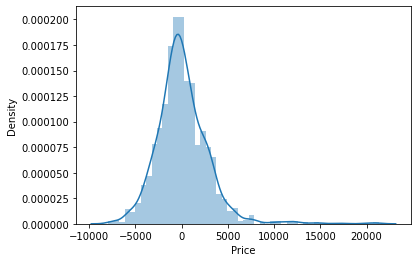

In [148]:
predict(LinearRegression(),1)

Training score : 0.7780701624764967
predictions are: 
 [12520.   4811.8 14009.6 ...  4761.2  5070.6 18885.2]


r2 score: 0.6653758705913446
MAE: 1716.0157229761346
MSE: 6939963.6038558725
RMSE: 2634.381066561152


C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


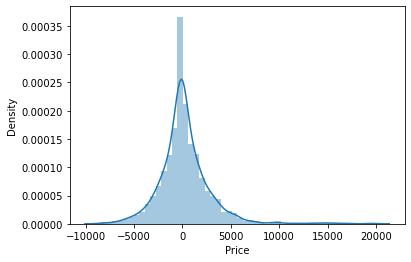

In [151]:
predict(KNeighborsRegressor(),0)

Training score : 0.9668462518120218
predictions are: 
 [ 6979.  4226. 13714. ...  6297.  5228. 19225.]


r2 score: 0.7526027905923985
MAE: 1314.4374122601778
MSE: 5130913.996006214
RMSE: 2265.1520911422735


C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


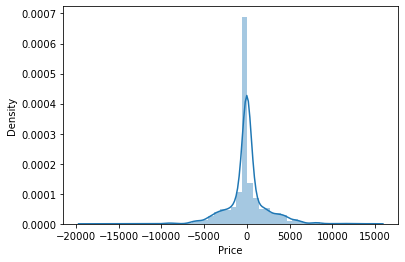

In [150]:
predict(DecisionTreeRegressor(),0)